<a href="https://colab.research.google.com/github/divyansh351/ML-Bootcamp-WOC/blob/main/LinRegGradDesWithoutNormalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**
Gradient Descent Model

### ***Importing necessary libraries***

### ***Mounting Google drive to read data***

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/cyberlabs/linear_data
train_path = '/content/drive/MyDrive/cyberlabs/linear_data/Linear_train.csv'
test_path = '/content/drive/MyDrive/cyberlabs/linear_data/Linear_test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

/content/drive/MyDrive/cyberlabs/linear_data


*Dropping the unnecessary columns from the dataset*

In [3]:
train = df_train.drop(["Unnamed: 0"], axis = 1)
test = df_test.drop(["Unnamed: 0"], axis = 1)

### ***Normalizing the dataset***

Normalizing helps the gradient discend to converge at a much faster rate with lesser number of iterations and a reasonable learning rate

In [4]:
def normalizeData(dataFrame):
    return (dataFrame - np.min(dataFrame)) / (np.max(dataFrame) - np.min(dataFrame))

In [5]:
#train = normalizeData(train)
#test = normalizeData(test)

### ***Separating Fabels and Features***

In [6]:
trainData = train.values
Y = trainData[:, -1].reshape(trainData.shape[0], 1)
X = trainData[:, :-1]

testData = test.values
Y_test = testData[:, -1].reshape(testData.shape[0], 1)
X_test = testData[:, :-1]

print("Dimensions of Training and Testing Datasets")
print("X_train :", X.shape)
print("Y_train :", Y.shape)
print("X_test :", X_test.shape)
print("Y_test :", Y_test.shape)

Dimensions of Training and Testing Datasets
X_train : (50000, 20)
Y_train : (50000, 1)
X_test : (10000, 20)
Y_test : (10000, 1)


### ***Adding a set of bias features in the first column of the dataset***

In [7]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

### ***Defining gradient descent function for the model***

In [8]:
def GradDes(X, Y, alpha, iter):
  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  costList = []
  for i in range(iter):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - alpha*d_theta
    costList.append(cost)
    if(i%(iter/10) == 0):
      print("Cost after", i, "iterations:", cost)
      
  return theta, costList

### ***Using the function to get the cost***

In [23]:
iter = 200000
alpha = 0.00000005
theta, costList = GradDes(X, Y, alpha = alpha, iter = iter)

Cost after 0 iterations: 13398388.663990432
Cost after 20000 iterations: 2308939.953718848
Cost after 40000 iterations: 438303.69537501835
Cost after 60000 iterations: 84519.57028887283
Cost after 80000 iterations: 17558.351327621494
Cost after 100000 iterations: 4874.62080489116
Cost after 120000 iterations: 2470.194145392293
Cost after 140000 iterations: 2014.0325213877054
Cost after 160000 iterations: 1927.4221251666975
Cost after 180000 iterations: 1910.9645319845315


*Here we observe that the cost has almost stopped to decrease after 1000 iterations, this suggests that the model is working fine and will give a fairly accurate prediction.*

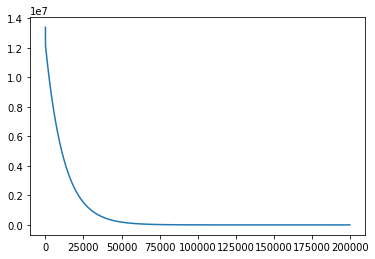

In [24]:
rng = np.arange(0, iter)
plt.plot(rng, costList)
plt.show()

### ***The normalized weights of the different features are listed below***

In [20]:
theta

array([[ 1.73691096e-03],
       [ 1.28089042e+01],
       [ 1.98731222e-01],
       [-2.65363897e+01],
       [ 7.80341034e+00],
       [ 3.65058581e+01],
       [ 1.51273315e-01],
       [ 1.86660856e+01],
       [-2.85410929e+01],
       [ 1.19952712e-01],
       [ 2.25688356e+01],
       [ 3.06091649e+01],
       [ 5.98840604e-01],
       [-8.96072556e+01],
       [ 3.34500346e+01],
       [ 4.42848157e+01],
       [ 5.01860743e+01],
       [ 2.36014062e+01],
       [-9.88927622e-01],
       [ 9.34981905e+01],
       [ 2.45658782e+01]])

### ***Using the weights to predict the normalized test dataset***

In [25]:
y_pred = np.dot(X_test, theta)

In [13]:
Y_test

array([[ -163.52272341],
       [ 6484.66451042],
       [ 2393.81808186],
       ...,
       [-1404.204034  ],
       [ 1972.37171111],
       [-6120.24877236]])

In [26]:
y_pred

array([[ -161.48303512],
       [ 6481.39118349],
       [ 2396.83774027],
       ...,
       [-1402.07883579],
       [ 1976.17970196],
       [-6117.7585235 ]])

### ***Calculating the accuracy of the model***

In [15]:
def meanAbsoluteError(actual, predicted):
  return sum(actual - predicted)/len(actual)

In [16]:
def meanSquaredError(actual, predicted):
  return sum(np.square(actual - predicted))/len(actual)

In [17]:
def rootMeanSquaredError(actual, predicted):
  return math.sqrt(meanSquaredError(actual, predicted))

In [18]:
def r2Score(actual, predicted):
  return 1 - sum(np.square(actual - predicted))/sum(np.square(actual - np.mean(actual)))

In [27]:
MAE = meanAbsoluteError(Y_test, y_pred)
MSE = meanSquaredError(Y_test, y_pred)
RMSE = rootMeanSquaredError(Y_test, y_pred)
R2S = r2Score(Y_test, y_pred)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R2 Score:", R2S)

Mean Absolute Error: [-0.38656038]
Mean Squared Error: [5.59268267]
Root Mean Squared Error: 2.364885340689703
R2 Score: [0.99999977]
